<a href="https://colab.research.google.com/github/deepesh-khamat/Test_cwebsite/blob/main/Socialmedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Source**

* Code from https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb

* google collab version https://colab.research.google.com/github/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb#scrollTo=E-hlmIU5tN3P

* Some updates can be found for 3rd edition at https://colab.research.google.com/github/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb
(collab version)



# Tutorial 1 (housing) Data Exploration and Visualization (Getting to know your data)

## Setup

In [1]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required
# - This Code is used for checking the version of the Python is >=3.5

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
# this is used to check the version of Scikit Learn

In [3]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
# These are the common library imports


In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#This is been used to plot Graphs.

# Get the data

With this code, we download and store the tgz file and extract it on the same location of the notebook and sub folders "datasets/housing/"

In [9]:
import os
import pandas as pd

# Specify the path to the uploaded CSV file in your Google Colab environment
csv_path = '/content/Social_Network_Ads.csv'  # Adjust the path as needed

def fetch_social_media_data(csv_path):
    # No need to create directories or download the file; it's already in Colab
    return pd.read_csv(csv_path)

# Call the function with the path to your uploaded CSV file
data = fetch_social_media_data(csv_path)



In [10]:
def load_social_media_data():
    csv_file = "Social_Network_Ads.csv"
    csv_path = os.path.join(SOCIAL_MEDIA_PATH, csv_file)
    return pd.read_csv(csv_path)

In [11]:
csv_path = "/content/Social_Network_Ads.csv"

# Load the CSV file into a DataFrame
social_media_data = pd.read_csv(csv_path)

# Now you can work with the social_media_data DataFrame
social_media_data.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


Each row represents the data from csv : https://www.kaggle.com/datasets/d4rklucif3r/social-network-ads

In [12]:

social_media_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [13]:
social_media_data["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
#This method shows a statistical summary of the numerical attributes
social_media_data.describe()

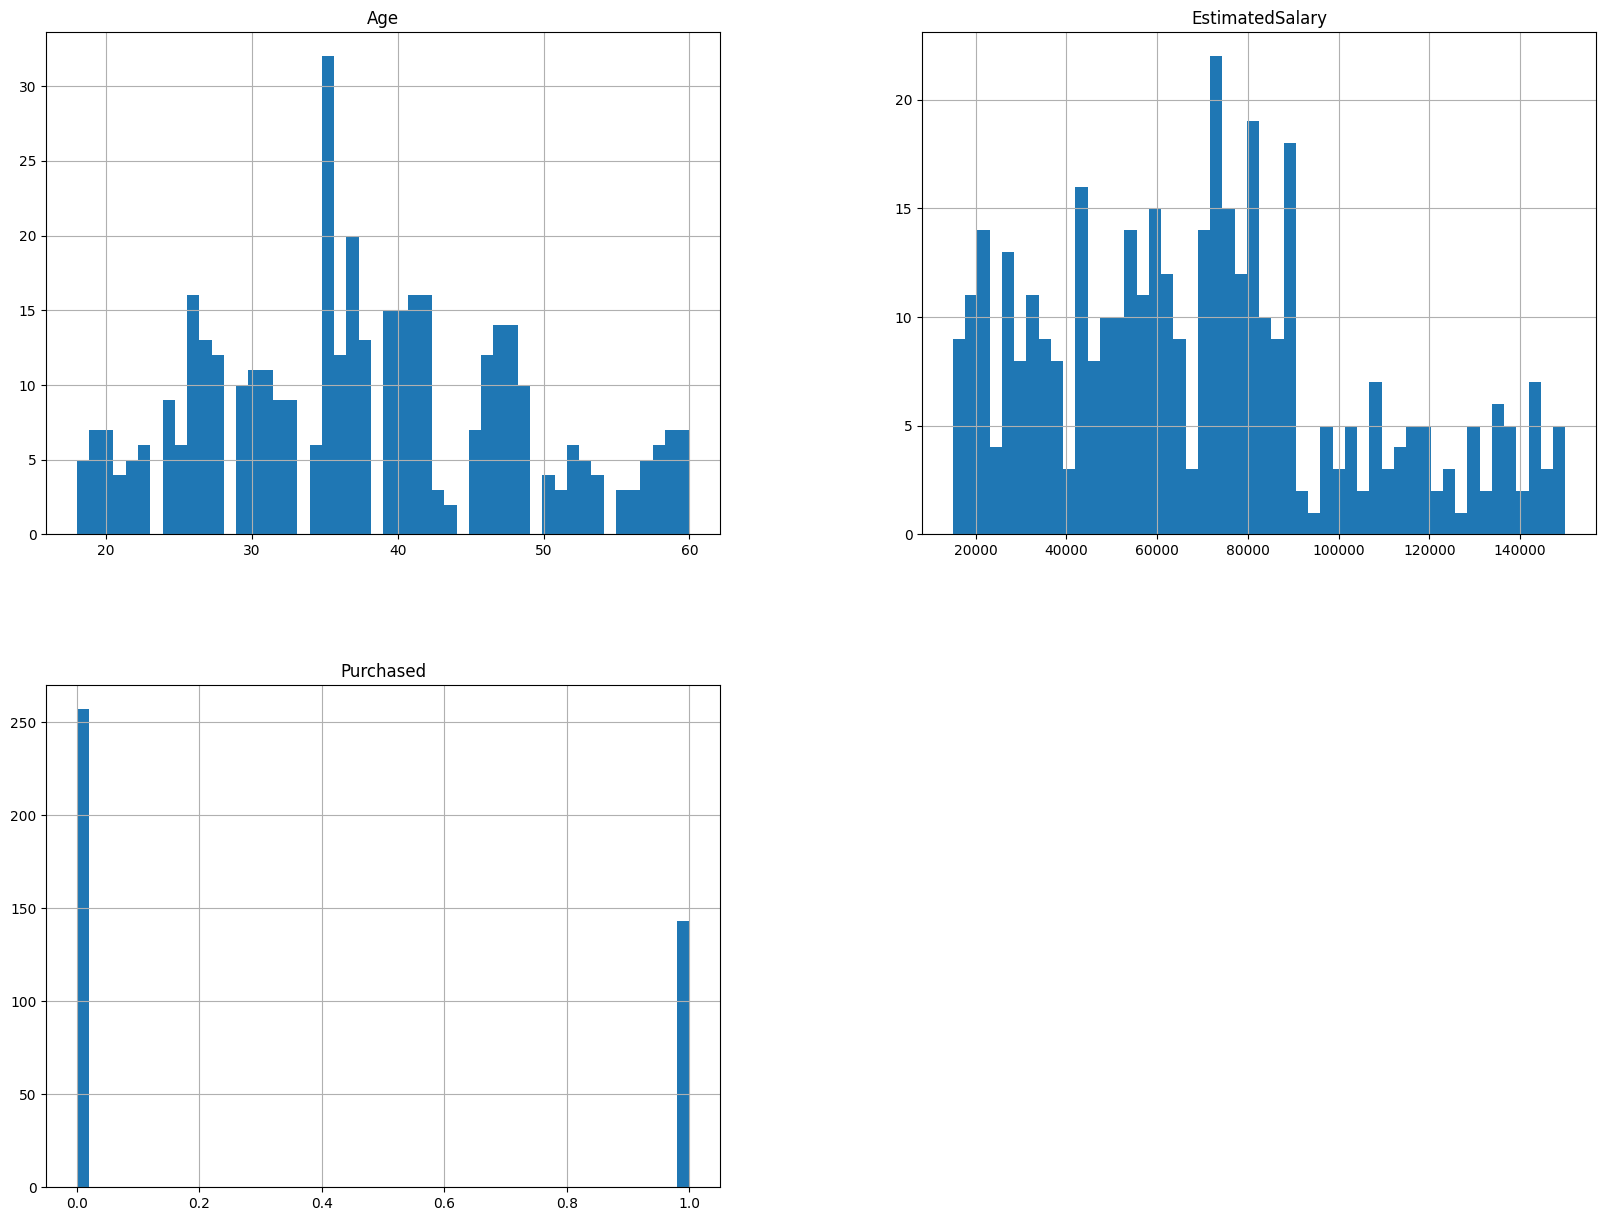

In [15]:
# Assuming you have a DataFrame named social_media_data
social_media_data.hist(bins=50, figsize=(20,15))
plt.show()

# Visualizing Geographical Data

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

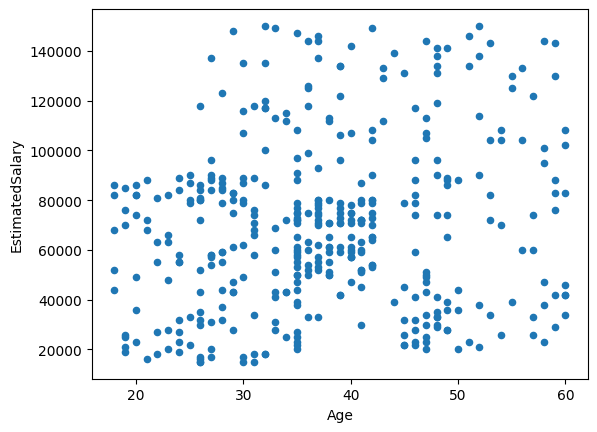

In [16]:
social_media_data.plot(kind="scatter", x="Age", y="EstimatedSalary")

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

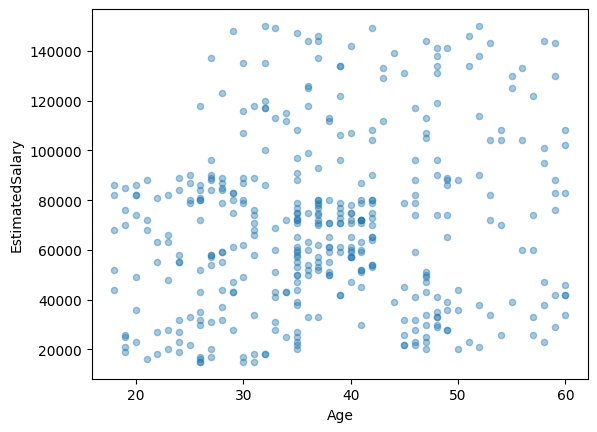

In [17]:
social_media_data.plot(kind="scatter", x="Age", y="EstimatedSalary", alpha=0.4)

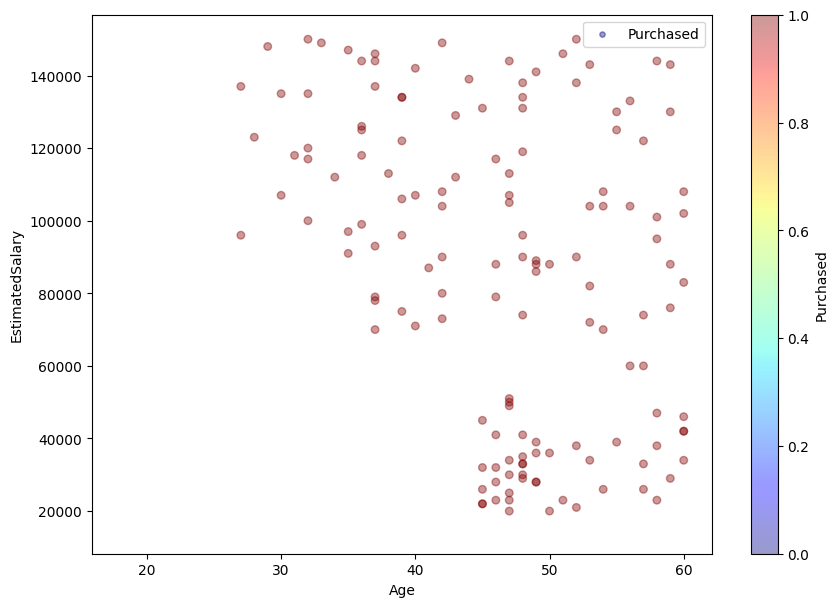

In [18]:
social_media_data.plot(
    kind="scatter",
    x="Age",
    y="EstimatedSalary",
    alpha=0.4,
    s=social_media_data["Purchased"] * 30,  # Adjust the marker size based on "Purchased" column
    label="Purchased",
    figsize=(10, 7),
    c="Purchased",  # Use "Purchased" for color mapping
    cmap=plt.get_cmap("jet"),
    colorbar=True,
)
plt.legend()



In [39]:
corr_matrix = social_media_data.corrwith(social_media_data["Purchased"])

In [43]:
corr_matrix = social_media_data.corr()
correlations_with_age = corr_matrix["Age"]["Purchased"]
correlations_with_salary = corr_matrix["EstimatedSalary"]["Purchased"]
correlations_with_purchased = corr_matrix["Purchased"]["Purchased"]

print("Correlation with 'Age':", correlations_with_age)
print("Correlation with 'EstimatedSalary':", correlations_with_salary)
print("Correlation with 'Purchased':", correlations_with_purchased)


Correlation with 'Age': 0.6224541988845287
Correlation with 'EstimatedSalary': 0.36208302580467777
Correlation with 'Purchased': 1.0


array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='EstimatedSalary', ylabel='Age'>,
        <Axes: xlabel='Purchased', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='EstimatedSalary'>,
        <Axes: xlabel='EstimatedSalary', ylabel='EstimatedSalary'>,
        <Axes: xlabel='Purchased', ylabel='EstimatedSalary'>],
       [<Axes: xlabel='Age', ylabel='Purchased'>,
        <Axes: xlabel='EstimatedSalary', ylabel='Purchased'>,
        <Axes: xlabel='Purchased', ylabel='Purchased'>]], dtype=object)

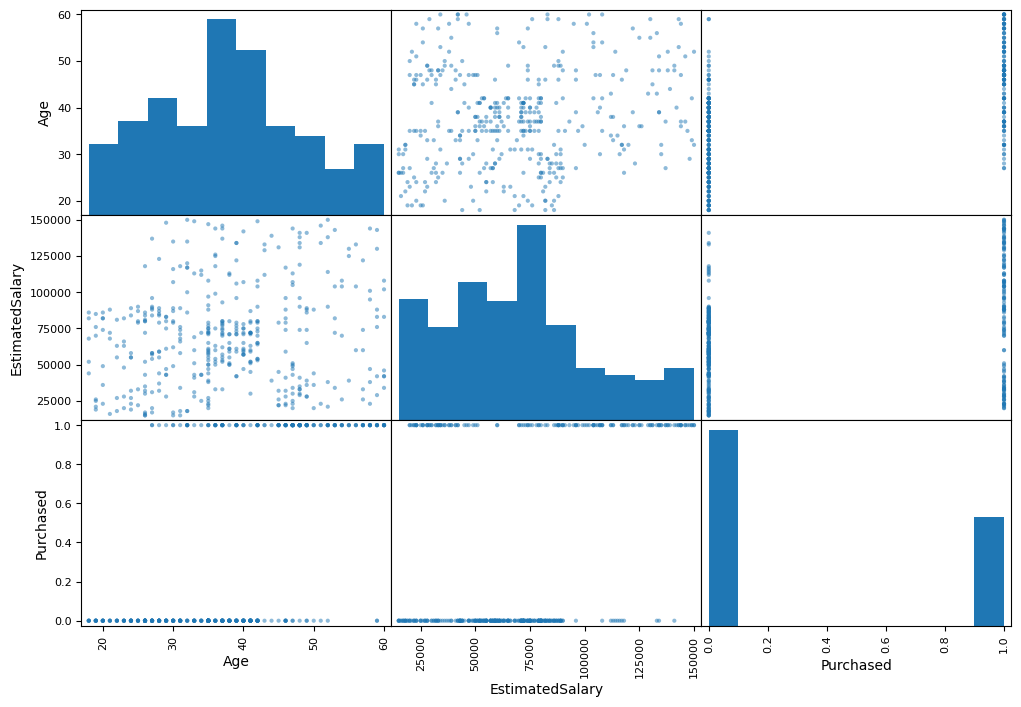

In [44]:
from pandas.plotting import scatter_matrix

attributes = ["Age", "EstimatedSalary", "Purchased"]
scatter_matrix(social_media_data[attributes], figsize=(12, 8))

# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other


Data Cleaning Process - No missing data

In [22]:
import pandas as pd

# Assuming your DataFrame is named 'social_media_data'
# You can replace 'social_media_data' with your actual DataFrame name

# Check for missing values and count them for each column
missing_values = social_media_data.isnull().sum()

# Print the result
print(missing_values)



Series([], dtype: float64)
